# Pytorch :- Transfer Learning.

## Summary.
Here i tried to aechieve maximum accuracy by using transfer learning. I used Vgg16 model.

In [1]:
# first of all import all necessary library.
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# according to need we will also import library later.

In [2]:
# Device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
# set random seed for reproducibility.
torch.manual_seed(42)

In [4]:
# by using this method we can download data.


# from torchvision import datasets, transforms

# # Define the path to store the dataset
# path = "C:\\Users\\BKJST\\Desktop\\practice"

# # Load the FashionMNIST dataset
# data = datasets.FashionMNIST(
#     root=path,
#     train=True,  # Set to True for training data, False for test data
#     transform=transforms.ToTensor(),  # Add a basic transformation to convert images to tensors
#     target_transform=None,  # No transformation for the target labels
#     download=True  # Set to True to download the dataset if not already available
# )

## but in current scenario we will use fmnist csv data.

In [5]:
# open csv file and read.
df = pd.read_csv('fmnist_small.csv')
df.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# lets check the shape
df.shape

(6000, 785)

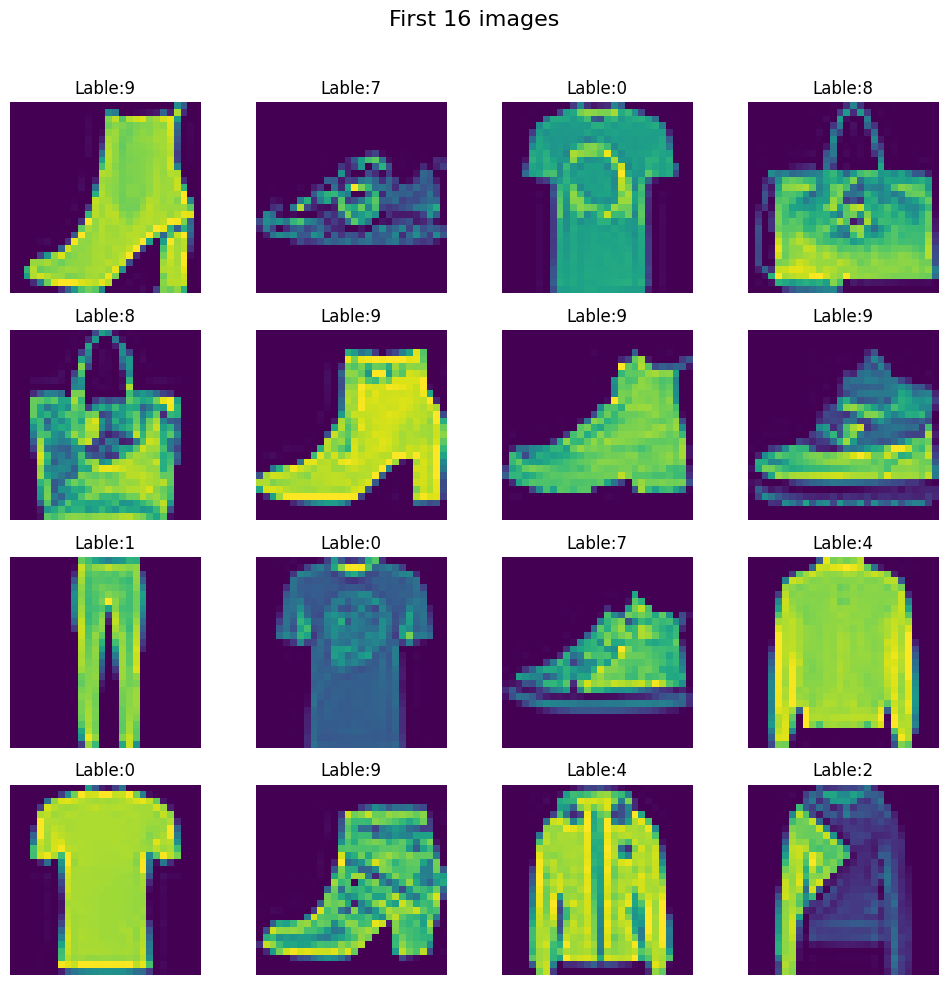

In [7]:
# Visualize the data by the help of matplotlib
fig, axes = plt.subplots(4,4, figsize = (10,10)) # set fig size is 10 * 10
# we used subplot to see multiple visual together.
fig.suptitle("First 16 images", fontsize = 16) # set title

for i, ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis(False) # we can also use "off"
    ax.set_title(f'Lable:{df.iloc[i, 0]}')

plt.tight_layout(rect = [0,0,1,0.96])
plt.show() # visualize the data.


In [8]:
# import machine learning library sklern (scikit learn)
# for train and test_split
import sklearn
from sklearn.model_selection import train_test_split

In [9]:
# train test split
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [10]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size= 0.2, random_state = 42)

In [11]:
# import torchvision for transform data.
from torchvision.transforms import transforms

custom_transform = transforms.Compose([
    transforms.Resize(256), # we can aslo write (256,256) or size=(256,256)
    transforms.ToTensor(),
    transforms.CenterCrop(224),  # (224, 224)
    transforms.Normalize(mean= [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]) # RGB
])

In [12]:
from PIL import Image
# import PIL (Python Image Library) for perform action on image.
import torch
from torch.utils.data import Dataset
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, features, labels, transform=None):
        self.features = features
        self.labels = labels
        self.transform = transform

    def __len__(self):  # Fixed the typo
        return len(self.features)  # Returns the number of samples

    def __getitem__(self, index):  # Added the 'index' parameter
        # Reshape the feature to a 28x28 grayscale image
        image = self.features[index].reshape(28, 28).astype(np.uint8)

        # Convert to 3-channel (RGB) image
        image = np.stack([image] * 3, axis=-1)  # Repeat across 3 channels
        image = Image.fromarray(image)  # Convert NumPy array to PIL image

        # Apply transformations, if any
        if self.transform:
            image = self.transform(image)

        # Fetch the corresponding label
        labels = torch.tensor(self.labels[index], dtype=torch.long)

        return image, labels

In [13]:
# dataset
train_dataset = CustomDataset(X_train, 
                              y_train, transform = custom_transform)
test_dataset = CustomDataset(X_test, y_test, transform = custom_transform)
test_dataset, train_dataset

(<__main__.CustomDataset at 0x1de4a079570>,
 <__main__.CustomDataset at 0x1de4a07a5f0>)

In [14]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, 
                          batch_size = 32, 
                          shuffle = True, 
                          pin_memory = True)
test_loader = DataLoader(test_dataset, 
                         batch_size = 32,
                         shuffle = False, 
                         pin_memory = True)

In [15]:
len(train_loader), len(test_loader)

(150, 38)

# VGG16

In [16]:
# import pretrained model
import torchvision.models as models

# in my case we will vgg 16.
vgg16 = models.vgg16(pretrained = True)

C:\Users\BKJST\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\BKJST\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
# model details means max pool layer conv. layer,  classifier etc.
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
# lets check model features
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [19]:
# check pretrained vgg16 classifier
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [20]:
for param in vgg16.features.parameters():
    param.requires_grad = False # Freeze training in fetures extraction part.

In [21]:
from torch import nn
# replace with our own classifier
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10),
)

In [22]:
# now we changed classifier.
# initially we had 1000 class, but now we have only 10 class.
# and we update only classifier part
# lets check
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=1024, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=1024, out_features=512, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=512, out_features=10, bias=True)
)

In [23]:
# send on device (cuda)
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Hyperparameter:
learning rate, epoch, optmizer: we can use or modify it according to condition and data.

In [24]:
learning_rate = 0.001 # learning should be slow in transfer learning.
epochs = 10 # for better result we can increase epoch.

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg16.classifier.parameters(), lr = learning_rate)

# Training Loop

In [ ]:
# lets train model with our data
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
    
        # forward pass
        outputs = vgg16(batch_features)
    
        # calculate the loss
        loss = criterion(outputs, batch_labels)
    
        # back pass
        optimizer.zero_grad()
    
        # loss bakward
        loss.backward()

        # update grads
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()

    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch: {epoch+1} | Loss: {avg_loss}")

Epoch: 1 | Loss: 0.7118142961462339
Epoch: 2 | Loss: 0.3686553097764651
Epoch: 3 | Loss: 0.2857272529353698
Epoch: 4 | Loss: 0.23648510629932085
Epoch: 5 | Loss: 0.17465324499101068
Epoch: 6 | Loss: 0.15218561240161457
Epoch: 7 | Loss: 0.11889441900013481


In [ ]:
# evaluate model
vgg16.eval()

In [ ]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:

        # move data to gpu
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        outputs = vgg16(batch_features)

        # predictions
        _, predicted = torch.max(outputs, 1)
        total = total + batch_labels.shape[0]
        correct = correct + (predicted == batch_labels).sum().item()
    # print accuracy accuracy on test data
    print(correct/total)

In [ ]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in train_loader:

        # mode data on gpu 
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        outputs = vgg16(batch_features)

        # prediction
        _, predicted = torch.max(outputs, 1)
        total = total + batch_labels.shape[0]
        correct = correct + (predicted == batch_labels).sum().item()

    # Accuracy on train data
    train_accuracy = (correct/total)*100
    print(f"Training Accuracy: {train_accuracy:.2f}%")

    # this part we can also use in training loop